In [1]:
import pandas as pd
sat_df = pd.read_csv('data/005_groups.csv')
sat_df.head()

,is_weekend,num_child,distance,rides,games,wait,clean,overall
0,True,0,9.844503,82.0,64.0,82.0,88.0,68.0
1,False,1,2.720221,85.0,83.0,100.0,90.0,100.0
2,False,3,1.878189,88.0,81.0,80.0,91.0,95.0
3,False,0,14.211682,73.0,52.0,68.0,74.0,55.0
4,False,1,9.362776,78.0,93.0,56.0,82.0,63.0


## Fitting linear models with lm().

In [2]:
sat_df.describe().round(2)

,num_child,distance,rides,games,wait,clean,overall
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,1.75,31.58,80.18,73.96,73.32,85.25,75.34
std,1.53,35.77,6.02,8.74,10.70,5.73,12.16
min,0.00,0.64,64.00,44.00,46.00,65.00,42.00
25%,0.00,9.07,76.00,68.00,66.00,82.00,67.00
50%,2.00,19.26,80.00,74.00,73.00,85.00,76.00
75%,3.00,39.01,84.00,80.00,80.00,89.00,85.00
max,5.00,233.30,99.00,100.00,100.00,100.00,100.00


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# See from histograms that all of the satisfaction ratings are close to normally distributed, except
# for weekend which is binomial, as expected, and distance, which has a highly skewed distribution.
# For most purposes it is a good idea to transform such a variable to a more normal distribution.
# A common transformation for such data.

sns.set_context('paper')
g = sns.PairGrid(sat_df.replace({False: 0, True: 1}))
g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10, alpha=0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)

In [ ]:
# Logarithmic transform; we take the log() of distance and add that to the dataframe.
sat_df['log_dist'] = sat_df.distance.apply(np.log)

Text(0, 0.5, 'Count')

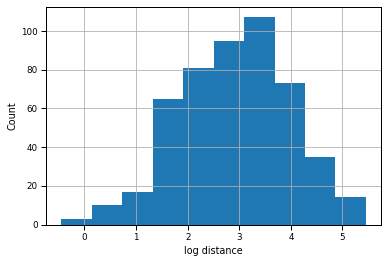

In [ ]:
sat_df.log_dist.hist()
plt.xlabel('log distance')
plt.ylabel('Count')

In [ ]:
sat_df.corr()

,is_weekend,num_child,distance,rides,games,wait,clean,overall,log_dist
is_weekend,1.000000,0.035537,0.057859,0.057817,-0.022099,0.027265,0.036172,0.012385,0.044948
num_child,0.035537,1.000000,0.009624,-0.027300,0.048249,0.014658,0.016123,0.337012,-0.043294
distance,0.057859,0.009624,1.000000,0.054943,0.037450,0.013249,0.024323,0.153014,0.827848
rides,0.057817,-0.027300,0.054943,1.000000,0.530970,0.356009,0.806247,0.637674,0.014385
games,-0.022099,0.048249,0.037450,0.530970,1.000000,0.290641,0.544000,0.502826,0.048214
wait,0.027265,0.014658,0.013249,0.356009,0.290641,1.000000,0.427469,0.576697,0.003471
clean,0.036172,0.016123,0.024323,0.806247,0.544000,0.427469,1.000000,0.679433,-0.004446
overall,0.012385,0.337012,0.153014,0.637674,0.502826,0.576697,0.679433,1.000000,0.099192
log_dist,0.044948,-0.043294,0.827848,0.014385,0.048214,0.003471,-0.004446,0.099192,1.000000


<AxesSubplot:>

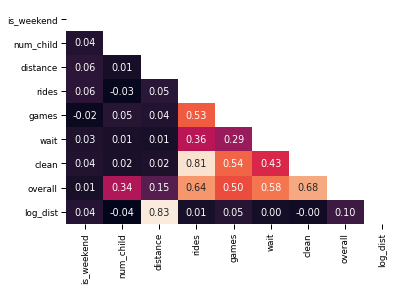

In [ ]:
# Check for extremely high correlations between items (such as r > 0.9). In the present data, rides
# and clean are highly related (r = 0.81) but not so strongly that remediation (omit some variables
# or consider transforming them) is strictly required.
sat_df_corr = sat_df.corr()
sns.heatmap(sat_df_corr, annot=True, fmt=".2f",
            mask=~np.tri(sat_df_corr.shape[0], k=-1, dtype=bool),
            cbar=False)

### Linear model with a single predictor.

In [ ]:
# The coefﬁcient for rides is 1.2887, so each additional rating point for rides is estimated to
# result in an increase of 1.2887 points of overallrating. (The coefﬁcient for the Intercept shows
# where the linear model line crosses the y-axis, but this is usually not interpretable in a
# satisfaction drivers analysis — for instance, there is no such thing as a possible negative rating
# on our scale — so it is generally ignored).
import statsmodels.formula.api as smf
smf.ols('overall ~ rides', data=sat_df).fit().summary() # y ~ x.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     341.3
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           2.02e-58
Time:                        11:07:01   Log-Likelihood:                -1827.7
No. Observations:                 500   AIC:                             3659.
Df Residuals:                     498   BIC:                             3668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9869      5.609     -4.990      0.000     -39.007     -16.967
rides          1.2887      0.070     18.474      0.000       1.152       1.426
==============================================================================
Omnibus:                        5.897   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.361
Skew:                          -0.194   Prob(JB):                       0.0685
Kurtosis:                       2.674   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# From this model we would expect that a customer who gives a rating of 95 for satisfaction with
# rides would give an overall rating of:
-27.9869 + 1.2887*95

94.43959999999998

### ols objects

In [ ]:
m1 = smf.ols('overall ~ rides', data=sat_df).fit()

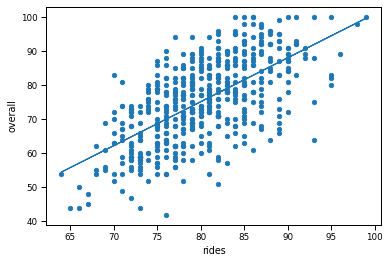

In [ ]:
# This plot and the one below it are identical
sat_df.plot(kind='scatter', x='rides', y='overall')
plt.plot(sat_df.rides, m1.predict(sat_df.rides))

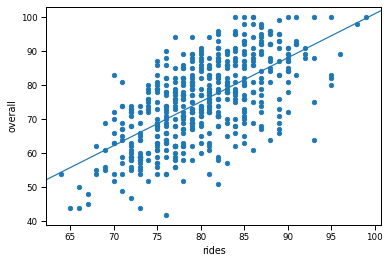

In [ ]:
from statsmodels.graphics import regressionplots
sat_df.plot(kind='scatter', x='rides', y='overall')
ax = plt.gca()
_ = regressionplots.abline_plot(model_results=m1, ax=ax)

In [ ]:
m1.params

Intercept   -27.986876
rides         1.288694
dtype: float64

In [ ]:
m1.predict({'rides': [95]})

0    94.439017
dtype: float64

In [ ]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     341.3
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           2.02e-58
Time:                        11:07:03   Log-Likelihood:                -1827.7
No. Observations:                 500   AIC:                             3659.
Df Residuals:                     498   BIC:                             3668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9869      5.609     -4.990      0.000     -39.007     -16.967
rides          1.2887      0.070     18.474      0.000       1.152       1.426
==============================================================================
Omnibus:                        5.897   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.361
Skew:                          -0.194   Prob(JB):                       0.0685
Kurtosis:                       2.674   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
m1.conf_int()

,0,1
Intercept,-39.006778,-16.966974
rides,1.151636,1.425752


In [ ]:
# The range is quite wide, ranging from −27.954 to 22.757, which means our predictions can be
# rather off for any given data point.
m1.resid.max(), m1.resid.min()

(22.757468292305703, -27.95383809778062)

In [ ]:
# The quartiles of the residuals suggest that they are fairly symmetric around 0, at least in the
# interquartile range:
np.percentile(m1.resid, q=range(0,101,25))

array([-27.9538381 ,  -6.56470511,  -0.04165295,   7.18008107,
        22.75746829])

Text(0, 0.5, 'Count')

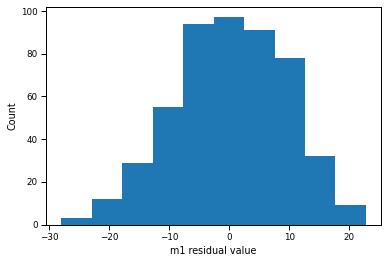

In [ ]:
# Another way to check for symmetry of the residuals would be with a histogram.
# The residuals are about symmetrical around 0.
plt.hist(m1.resid)
plt.xlabel('m1 residual value')
plt.ylabel('Count')

In [ ]:
# Standard deviation of the residuals: This value isn't very useful on its own, but can be valuable
# for comparing models
np.std(m1.resid)

9.36040355287387

## Checking Model Fit (is it reasonable to use this/that linear model).

In [ ]:
# There are several assumptions when a linear model is ﬁtted to data. The ﬁrst assumption is that the
# relationship between the predictors and the outcomes is linear. If the relationship is not linear,
# then the model will make systematic errors. For example, if we generate data where y is a function 
# of x^2 and then fit a linear model y ∼ x, this will draw a straight line through a cloud of points
# that is curved.

# t-test indicates that the coefficient is not significantly different from zero (p-value 0.158).
# Also, Adj. R-squared is 0.002.
np.random.seed(8266)
x = np.random.normal(size=500)
y = x**2 + np.random.normal(size=500)
toy_model = smf.ols('y ~ x', data={'x': x, 'y': y}).fit()
toy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.999
Date:                Mon, 30 Aug 2021   Prob (F-statistic):              0.158
Time:                        11:07:04   Log-Likelihood:                -1028.1
No. Observations:                 500   AIC:                             2060.
Df Residuals:                     498   BIC:                             2069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1192      0.085     13.184      0.000       0.952       1.286
x             -0.1129      0.080     -1.414      0.158      -0.270       0.044
==============================================================================
Omnibus:                      201.006   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1017.482
Skew:                           1.711   Prob(JB):                    1.14e-221
Kurtosis:                       9.093   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'x vs y with fit line')

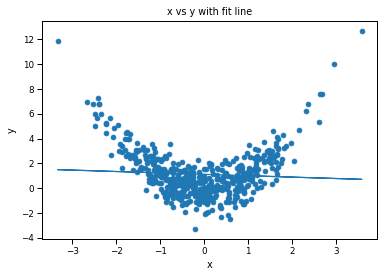

In [ ]:
plt.scatter(x,y)
plt.plot(x, toy_model.predict({'x': x}))
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y with fit line')

Text(0.5, 1.0, 'Predicted y values vs Residuals')

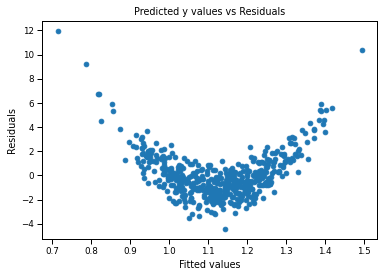

In [ ]:
# See unusual residual pattern because y ~ x relationship is non-linear.
plt.scatter(x=toy_model.fittedvalues, y=toy_model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Predicted y values vs Residuals')

In [ ]:
# Another assumption of a linear model is that prediction errors — the parts of the data that do not
# exactly fit the model — are normally distributed and look like random noise with no pattern. One
# way to examine this is to plot the model's ﬁtted values (the predictions) versus the residuals
# (the prediction errors).
from statsmodels.graphics import gofplots
def plot_gof_figures(model):
  '''Plot a multipanel figure of goodness of fit plots'''
  sns.residplot(model.fittedvalues, model.resid, lowess=True)
  plt.xlabel('Fitted values')
  plt.ylabel('Residuals')
  plt.title('Residuals vs Fitted')
  plt.show()

  _ = gofplots.qqplot(model.resid, fit=True, line='45')
  plt.title('Normal Q-Q')
  plt.show()

  plt.scatter(model.fittedvalues, np.abs(model.resid)**.5)
  plt.xlabel('Fitted values')
  plt.ylabel('Square root of the standardized residuals')
  plt.title('Scale-Location')
  plt.show()

  regressionplots.plot_leverage_resid2(model)

C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


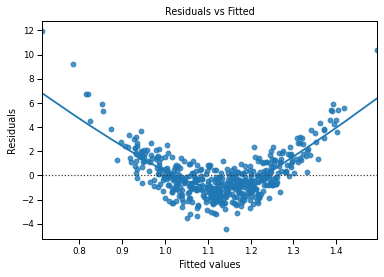

C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


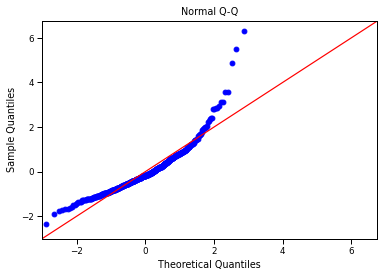

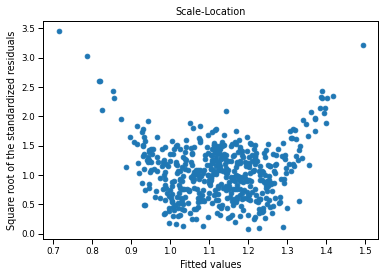

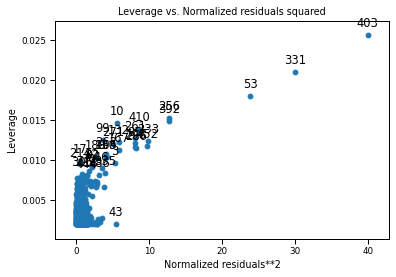

In [ ]:
# Residuals vs Fitted: There is a clear pattern in the residuals. The solution is usually to
# transform x.

# Scale-Location: Plot is similar to Residuals vs Fitted plot, except that instead of plotting the
# raw residual value, it plots the square root of the absolute value of the residual (referred to as
# the standardized residual). Again, there should be no clear pattern; if there were it might
# indicate a non-linear relationship.

# Normal Q-Q: QQ plot helps you see whether the residuals follow a normal distribution (residuals
# should be on or close to line (normal distributed)).

# Leverage vs Normalized: Points are automatically labeled with row numbers if they are potentially
# problematic outliers based on high standardized residual distance and leverage on the model. It is
# not recommended to remove outliers, yet it is recommended to inspect them and determine whether
# there is a problem with the data.

plot_gof_figures(toy_model)

C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


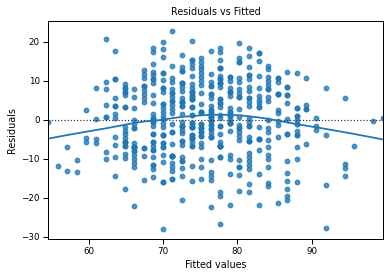

C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


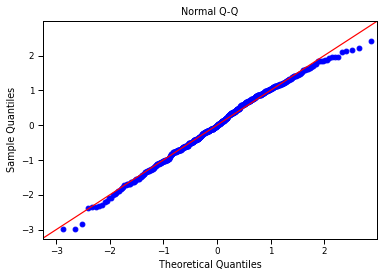

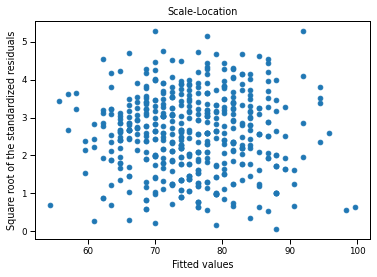

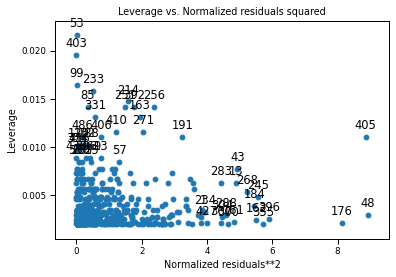

In [ ]:
# Looks good.
plot_gof_figures(m1)

In [ ]:
sat_df.loc[[ 405, 48, 176]]

,is_weekend,num_child,distance,rides,games,wait,clean,overall,log_dist
405,True,0,11.445116,93.0,77.0,75.0,89.0,64.0,2.437563
48,False,0,8.434066,76.0,61.0,48.0,73.0,42.0,2.132279
176,True,0,18.318936,82.0,61.0,74.0,84.0,51.0,2.907935


## Fitting Linear Models with Multiple Predictors.

In [ ]:
# The R-squared increased to 0.595, meaning that about 60% of the variation in overall ratings is
# explained by the ratings for specific features.
m2 = smf.ols('overall ~ rides + games + wait + clean',
             data=sat_df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     181.9
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           9.91e-96
Time:                        11:07:13   Log-Likelihood:                -1732.2
No. Observations:                 500   AIC:                             3474.
Df Residuals:                     495   BIC:                             3495.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.6088      5.246    -10.219      0.000     -63.916     -43.302
rides          0.4256      0.099      4.279      0.000       0.230       0.621
games          0.1861      0.048      3.843      0.000       0.091       0.281
wait           0.3842      0.036     10.647      0.000       0.313       0.455
clean          0.6205      0.108      5.725      0.000       0.408       0.834
==============================================================================
Omnibus:                       12.515   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.113
Skew:                          -0.390   Prob(JB):                      0.00142
Kurtosis:                       2.854   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# The residual standard error is now 7.732, whereas it was 9.360 for the simpler model, meaning that
# the predictions are more accurate.
np.std(m2.resid)

7.732470220113993

In [ ]:
# Residuals appear to be relatively symmetric.
np.percentile(m2.resid, q=range(0,101,25))

array([-26.0408112 ,  -4.89848961,   0.88100141,   5.56376647,
        18.2162639 ])

### Comparing Models.

In [ ]:
# Based on the R-squared values we can say that m2 explains more of the variation in satisfaction
# than m1. However, a model with more predictors usually has a higher R2, so we could instead compare
# adjusted R-squared values, which control for the number of predictors in the model.
print(m1.rsquared)
print(m2.rsquared)

0.4066280681606046
0.5950752098970709


In [ ]:
print(m1.rsquared_adj)
print(m2.rsquared_adj)

0.4054365582573126
0.5918030903810876


In [ ]:
# ANOVA: determines whether m2 explains more of the variation than m1. The low p-value indicates
# that the additional predictors in m2 significantly improve the fit of the model. If these two
# models were the only ones under consideration, we would proceed with m2 rather than m1.
from statsmodels.stats import anova as sms_anova
sms_anova.anova_lm(m1, m2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,498.0,43808.577336,0.0,NaN,NaN,NaN
1,495.0,29895.547852,3.0,13913.029484,76.789021,8.500020e-41


### Using a Model to Make Predictions.

In [ ]:
# E.g., customer rated the four separate aspects as 100 points each:
m2.params.Intercept + m2.params.rides*100 + m2.params.games*100\
  + m2.params.wait*100 + m2.params.clean*100

108.02382449445318

In [ ]:
m2.params.Intercept + (m2.params[1:].sum() * 100)

108.0238244944532

In [ ]:
sat_df.head(10)

,is_weekend,num_child,distance,rides,games,wait,clean,overall,log_dist
0,True,0,9.844503,82.0,64.0,82.0,88.0,68.0,2.286913
1,False,1,2.720221,85.0,83.0,100.0,90.0,100.0,1.000713
2,False,3,1.878189,88.0,81.0,80.0,91.0,95.0,0.630308
3,False,0,14.211682,73.0,52.0,68.0,74.0,55.0,2.654064
4,False,1,9.362776,78.0,93.0,56.0,82.0,63.0,2.236742
5,False,2,38.419422,83.0,71.0,65.0,84.0,81.0,3.648563
6,False,5,35.146796,81.0,71.0,84.0,86.0,79.0,3.559533
7,True,0,4.644160,78.0,70.0,76.0,86.0,69.0,1.535611
8,False,1,32.513403,80.0,72.0,76.0,85.0,91.0,3.481652
9,True,3,39.223945,77.0,73.0,91.0,85.0,85.0,3.669287


In [ ]:
# This predicts satisfaction for the ﬁrst 10 customers.
m2.predict(sat_df.head(10)) # statsmodel is smart enough to use the columns with correct column names.

0    79.303964
1    92.271882
2    86.113782
3    59.175321
4    69.286346
5    72.019136
6    79.708122
7    75.172110
8    75.774821
9    80.446600
dtype: float64

In [ ]:
# The predictions for observations used to estimate the model are also stored in the model object,
# and can be accessed with the fitted valuessuffix.
m2.fittedvalues[:10]

0    79.303964
1    92.271882
2    86.113782
3    59.175321
4    69.286346
5    72.019136
6    79.708122
7    75.172110
8    75.774821
9    80.446600
dtype: float64

In [ ]:
# The predict() method will also accept a dict object.
m2.predict({'rides': 100,
            'games': 100,
            'wait': 100,
            'clean': 100})

0    108.023824
dtype: float64

### Standardizing the Predictors.

Thus far, we have interpreted raw coefﬁcients in order to evaluate the contributions of different aspects of a visit (each rated on a 100 point scale) to the overall satisfaction with the amusement park (also rated on a 100 point scale). However, if the variables have different scales, such as a survey where rides is rated on a 1–10 scale while cleanliness is rated 1–5 scale, then their coefﬁcient values would not be directly comparable. In the present data, this occurs with the distance and log_dist variables, which are not on a 100 point scale.


In [ ]:
sat_df.head()

,is_weekend,num_child,distance,rides,games,wait,clean,overall,log_dist
0,True,0,9.844503,82.0,64.0,82.0,88.0,68.0,2.286913
1,False,1,2.720221,85.0,83.0,100.0,90.0,100.0,1.000713
2,False,3,1.878189,88.0,81.0,80.0,91.0,95.0,0.630308
3,False,0,14.211682,73.0,52.0,68.0,74.0,55.0,2.654064
4,False,1,9.362776,78.0,93.0,56.0,82.0,63.0,2.236742


When you wish to compare coefficients, it can be helpful to standardize data on a common scale before fitting a model (and after transforming any variables to a normally distributed scale). The most common standardization converts values to zero-centered units of standard deviation. This subtracts a variable's mean from each observation and then divides by the standard deviation, and is also known as a Z score.

In [ ]:
((sat_df.rides - sat_df.rides.mean()) / sat_df.rides.std()).head(10)

0    0.302715
1    0.801147
2    1.299580
3   -1.192583
4   -0.361862
5    0.468859
6    0.136571
7   -0.361862
8   -0.029574
9   -0.528006
Name: rides, dtype: float64

The question of standardizing values depends primarily on how you want to use a model's coefﬁcients. If you want to interpret coefficients in terms of the original scales, then you would not standardize data first. However, in satisfaction driver analysis we are usually more concerned with the relative contribution of different predictors and wish to compare them, and standardization assists with this.

In [ ]:
# If we do not want to worry about the scale of our variables, only their relative contributions, 
# we may create a scaled version of sat_df.
sat_df_scaled = sat_df.copy()
idx = ['clean', 'games', 'rides', 'wait', 'log_dist', 'overall']
sat_df_scaled[idx] = (sat_df[idx] - sat_df[idx].mean(axis=0))\
  /sat_df[idx].std(axis=0)

In [ ]:
sat_df_scaled.head()

,is_weekend,num_child,distance,rides,games,wait,clean,overall,log_dist
0,True,0,9.844503,0.302715,-1.139289,0.811454,0.480319,-0.603270,-0.598161
1,False,1,2.720221,0.801147,1.034490,2.494194,0.829134,2.027508,-1.801954
2,False,3,1.878189,1.299580,0.805671,0.624483,1.003542,1.616449,-2.148627
3,False,0,14.211682,-1.192583,-2.512202,-0.497343,-1.961389,-1.672024,-0.254534
4,False,1,9.362776,-0.361862,2.178584,-1.619169,-0.566127,-1.014329,-0.645118


In [ ]:
sat_df_scaled[idx].describe().round(2)

,clean,games,rides,wait,log_dist,overall
count,500.00,500.00,500.00,500.00,500.00,500.00
mean,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.53,-3.43,-2.69,-2.55,-3.16,-2.74
25%,-0.57,-0.68,-0.69,-0.68,-0.68,-0.69
50%,-0.04,0.00,-0.03,-0.03,0.03,0.05
75%,0.65,0.69,0.64,0.62,0.69,0.79
max,2.57,2.98,3.13,2.49,2.36,2.03


## Using Factors as Predictors.

While m2 above was reasonable, we can continue to improve it. It is typical to try many models before arriving at a ﬁnal one. For the next step, we wonder whether satisfaction is different for customers who come on the weekend, travel farther, or have more children. We add these predictors to the model using standardized data.

In [ ]:
# Coefficient of is_weekend[T.True] has meaning: on average those who come on the weekend rate their
# overall satisfaction 0.07 standard units (standard deviations) lower than those who come on a
# weekday, although it is not a significant effect (p-value 0.138).
m3 = smf.ols('overall ~ rides + games + wait + clean + is_weekend'
             ' + log_dist + num_child', data=sat_df_scaled).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     176.3
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          1.01e-129
Time:                        11:07:16   Log-Likelihood:                -395.18
No. Observations:                 500   AIC:                             806.4
Df Residuals:                     492   BIC:                             840.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3516      0.042     -8.423      0.000      -0.434      -0.270
is_weekend[T.True]    -0.0724      0.049     -1.485      0.138      -0.168       0.023
rides                  0.2558      0.042      6.147      0.000       0.174       0.338
games                  0.0992      0.029      3.371      0.001       0.041       0.157
wait                   0.3363      0.027     12.591      0.000       0.284       0.389
clean                  0.2718      0.043      6.310      0.000       0.187       0.356
log_dist               0.1069      0.024      4.423      0.000       0.059       0.154
num_child              0.2190      0.016     13.864      0.000       0.188       0.250
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.163
Skew:                          -0.017   Prob(JB):                        0.922
Kurtosis:                       2.918   Cond. No.                         5.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# When your data include factors, you must be careful about the data type. For example, num_child is
# a numeric variable, ranging 0–5, but it doesn't necessarily make sense to treat it as a number, as
# we did in m3. In doing so, we implicitly assume that satisfaction goes up or down linearly as a
# function of the number of children, and that the effect is the same for each additional child.
# (Anyone who has taken a group of children to an amusement park might guess that this is an
# unreasonable assumption.)
dummy_vals = pd.get_dummies(sat_df_scaled.num_child, prefix='num_child')
dummy_vals.head()

,num_child_0,num_child_1,num_child_2,num_child_3,num_child_4,num_child_5
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [ ]:
sat_df_child_factor = sat_df_scaled.join(dummy_vals)

In [ ]:
# Note that the coefficient for num_child_0 is negative, indicating that parties without children
# rate lower. Comparing the coefﬁcients for num_child_1 and num_child_0, parties with 1 child rate
# their overall satisfaction on average 1.0075 standard deviations higher than parties without
# children (the difference between 0.2097 and −0.7978). Similarly, the coefficient for num_child_2
# is 0.2549, meaning that people with two children rate their overall satisfaction on average over
# a full standard deviation (0.2549 - (-0.7978) = 1.0527) higher than those with no children.
m4 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ num_child_0 + num_child_1 + num_child_2 + num_child_3'
             '+ num_child_4 + num_child_5',
             data=sat_df_child_factor).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     220.3
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          5.23e-174
Time:                        11:07:16   Log-Likelihood:                -282.53
No. Observations:                 500   AIC:                             587.1
Df Residuals:                     489   BIC:                             633.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1059      0.020      5.391      0.000       0.067       0.144
rides           0.2604      0.033      7.803      0.000       0.195       0.326
games           0.0968      0.024      4.097      0.000       0.050       0.143
wait            0.3139      0.022     14.570      0.000       0.272       0.356
clean           0.2710      0.035      7.819      0.000       0.203       0.339
log_dist        0.1001      0.019      5.154      0.000       0.062       0.138
num_child_0    -0.7978      0.035    -22.574      0.000      -0.867      -0.728
num_child_1     0.2097      0.047      4.456      0.000       0.117       0.302
num_child_2     0.2549      0.039      6.492      0.000       0.178       0.332
num_child_3     0.2108      0.046      4.563      0.000       0.120       0.302
num_child_4     0.1315      0.053      2.471      0.014       0.027       0.236
num_child_5     0.0968      0.077      1.253      0.211      -0.055       0.249
==============================================================================
Omnibus:                        0.428   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.511
Skew:                          -0.064   Prob(JB):                        0.775
Kurtosis:                       2.909   Cond. No.                     4.74e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

A striking thing about m4 is that the increase in overall satisfaction is about the same regardless of how many children there are in the party — about 1 standard deviation higher for any number of children. This suggests that we don't actually need to estimate a different increase for each number of children. In fact, if the increase is the same for 1 child as for 3 children, attempting to fit a model that scales increasingly per child would result in a less accurate estimate. Instead, we declare a new variable called has_child that is True when the party has children in it and False when the party does not have children.

In [ ]:
sat_df_scaled['has_child'] = sat_df_scaled.num_child.apply(lambda x:
                                                           x > 0)
m5 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ has_child', data=sat_df_scaled).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     365.9
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          5.25e-178
Time:                        11:07:17   Log-Likelihood:                -284.90
No. Observations:                 500   AIC:                             583.8
Df Residuals:                     493   BIC:                             613.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6919      0.035    -19.929      0.000      -0.760      -0.624
has_child[T.True]     1.0028      0.042     23.956      0.000       0.921       1.085
rides                 0.2645      0.033      7.950      0.000       0.199       0.330
games                 0.0970      0.024      4.125      0.000       0.051       0.143
wait                  0.3184      0.021     14.872      0.000       0.276       0.361
clean                 0.2654      0.035      7.691      0.000       0.198       0.333
log_dist              0.1005      0.019      5.197      0.000       0.062       0.138
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.444
Skew:                          -0.055   Prob(JB):                        0.801
Kurtosis:                       2.905   Cond. No.                         4.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interaction Terms.

Model m5 estimates overall satisfaction to be about 1 standard deviation higher for parties with children. However, one might now wonder how children inﬂuence other aspects of the ratings. For instance, is the relationship between satisfaction and waiting times different for parties with and without children? One might guess from experience that wait time would be more important to parties with children. To explore this question, we need to incorporate interactions into the model. <br>
We can include an interaction of two terms by using the : operator between variables in a formula. For instance, to estimate overall as a function of rides plus the interaction of wait and has_child, we could write the formula as $$overall ∼ rides + wait:has\_child$$.

In [ ]:
# We create a new model with interactions between the satisfaction ratings and two variables that
# describe the visit:no_child and is_weekend.

# The model object m6 now includes eight interaction terms between ratings for features of the park
# and has_child and weekend. Only one of these interactions is signiﬁcant: the wait:has_childinteraction.
# This suggests we could drop the non-signiﬁcant interactions to create a new model m7. See below.

m6 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ has_child + rides:has_child + games:has_child'
             '+ wait:has_child + clean:has_child + rides:is_weekend'
             '+ games:is_weekend + wait:is_weekend + clean:is_weekend',
             data=sat_df_scaled).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     163.3
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          2.59e-173
Time:                        11:07:17   Log-Likelihood:                -273.20
No. Observations:                 500   AIC:                             576.4
Df Residuals:                     485   BIC:                             639.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.6893      0.035    -19.895      0.000      -0.757      -0.621
has_child[T.True]            0.9985      0.042     23.996      0.000       0.917       1.080
rides                        0.2116      0.067      3.138      0.002       0.079       0.344
rides:has_child[T.True]      0.0641      0.070      0.916      0.360      -0.073       0.202
rides:is_weekend[T.True]    -0.0010      0.066     -0.015      0.988      -0.131       0.129
games                        0.1001      0.047      2.141      0.033       0.008       0.192
games:has_child[T.True]     -0.0452      0.051     -0.888      0.375      -0.145       0.055
games:is_weekend[T.True]     0.0746      0.048      1.564      0.119      -0.019       0.168
wait                         0.1917      0.043      4.468      0.000       0.107       0.276
wait:has_child[T.True]       0.1943      0.047      4.179      0.000       0.103       0.286
wait:is_weekend[T.True]     -0.0304      0.043     -0.708      0.479      -0.115       0.054
clean                        0.3332      0.072      4.611      0.000       0.191       0.475
clean:has_child[T.True]     -0.0781      0.076     -1.030      0.303      -0.227       0.071
clean:is_weekend[T.True]    -0.0081      0.069     -0.118      0.906      -0.143       0.127
log_dist                     0.1054      0.019      5.459      0.000       0.067       0.143
==============================================================================
Omnibus:                        1.192   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.179
Skew:                          -0.012   Prob(JB):                        0.555
Kurtosis:                       2.763   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# In the results, we see that attending the park with children is a predictor of higher
# satisfaction, and waiting time is more important predictor among those with children
# (wait:has_child[T.True]) than those without children.
m7 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ has_child + wait:has_child',
             data=sat_df_scaled).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     326.8
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          1.83e-180
Time:                        11:07:17   Log-Likelihood:                -276.08
No. Observations:                 500   AIC:                             568.2
Df Residuals:                     492   BIC:                             601.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7002      0.034    -20.471      0.000      -0.767      -0.633
has_child[T.True]          1.0092      0.041     24.497      0.000       0.928       1.090
rides                      0.2597      0.033      7.931      0.000       0.195       0.324
games                      0.1002      0.023      4.329      0.000       0.055       0.146
wait                       0.1961      0.036      5.458      0.000       0.126       0.267
wait:has_child[T.True]     0.1739      0.041      4.202      0.000       0.093       0.255
clean                      0.2710      0.034      7.978      0.000       0.204       0.338
log_dist                   0.1057      0.019      5.547      0.000       0.068       0.143
==============================================================================
Omnibus:                        0.890   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.960
Skew:                          -0.040   Prob(JB):                        0.619
Kurtosis:                       2.801   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What do we do with these results? We identify several possible interventions. If we want to
increase satisfaction overall, we could perhaps do so by trying to increase the number of visitors with children. Alternatively, if we want to appeal to visitors without children, we might engage in further research to understand why their ratings are lower. If we are allocating budget to personnel, the importance of cleanliness suggests continuing to allocate resources there (as opposed, say, to games). We might also want to learn more about the association between children and waiting time, and whether there are things we could do to make waiting less frequent or more enjoyable. There are many more such questions one could pose from results like these; a crucial step in analysis is to think carefully
about the implications and where one might be able to make a product or intervention. When considering actions to take, it is especially important to remember that the model assesses association, not causation. Possible changes in outcome should be viewed as hypotheses suggested by the model, to be confirmed separately.

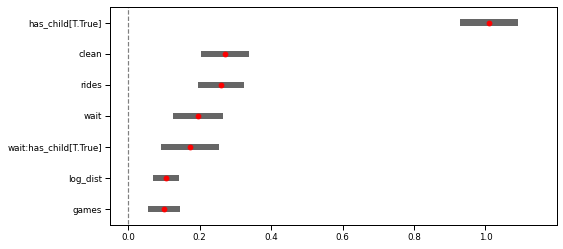

In [ ]:
# To share these results with others, it is helpful to create a new satisfaction drivers plot.
# The plot summarizes the relative contribution of each element on overall satisfaction.
def plot_confidence_intervals(centers, conf_ints, zero_line=False):
  """Plot centers and confidence intervals
  
  arguments:
  centers: Series containing center poitns (mean values)
  conf_ints: Dataframe containing the lower bound in the 0th column and upper
             bound in the 1st
  zero_line: Boolean specifying whether to include a line at x=0 (optional,
             default False)"""
  
  plt.figure(figsize=(8,4))
  sort_index = np.argsort(centers.values)
  centers = centers[sort_index]
  conf_ints = conf_ints.iloc[sort_index]
  plt.barh(y=range(len(centers)), left=conf_ints[0],
           width=conf_ints[1]-conf_ints[0],
           height=0.2, color='0.4')
  plt.yticks(range(len(centers)), conf_ints.index)
  plt.plot(centers, range(len(centers)), 'ro')
  if zero_line:
    plt.plot([0,0],[-.5, len(centers) - 0.5], 'gray',
             linestyle='dashed')
    plt.xlim((-.05, 1.1 * conf_ints.iloc[:,1].max()))
  plt.ylim((-.5, len(centers) - 0.5))

plot_confidence_intervals(m7.params[1:], m7.conf_int().iloc[1:], zero_line=True)

## Advanced Formula Syntax
As we've seen, you can include an interaction between x and z by including x:z in the formula. If you want to include two variables along with their interaction, you can use x*z, which is the equivalent to writing x + z + x:z. <br>
The intercept can be removed from a model by including -1 in the formula. This is ill-advised in general linear models with continuous predictors, because it forces the line to go through the origin (0, 0), which alters the other coefficients. However, it can be helpful in some kinds of models, such as those with purely categorical predictors. <br>
![interaction](images/syntax_interactions.png "interaction")<br>
## Overfitting
This process of adding too many variables and ending up with a less precise or inappropriate model is called overfitting. One way to avoid it is to keep a close eye on the standard errors for the coefficients; small standard errors are an indicator that there are sufﬁcient data to estimate the model. Another approach is to select a subset of the data to hold out and not use to estimate the model. After fitting the model, use predict() on the hold out data and see how well it performs. Overfitted models will perform poorly when predicting outcomes for holdout data. It is usually more valuable in practice to identify a few variables with clear and confident interpretations.